In [ ]:
# Question: Multivariate Outlier Detection Using Mahalanobis Distance
# Description: Implement Mahalanobis distance to detect multivariate outliers in a dataset.



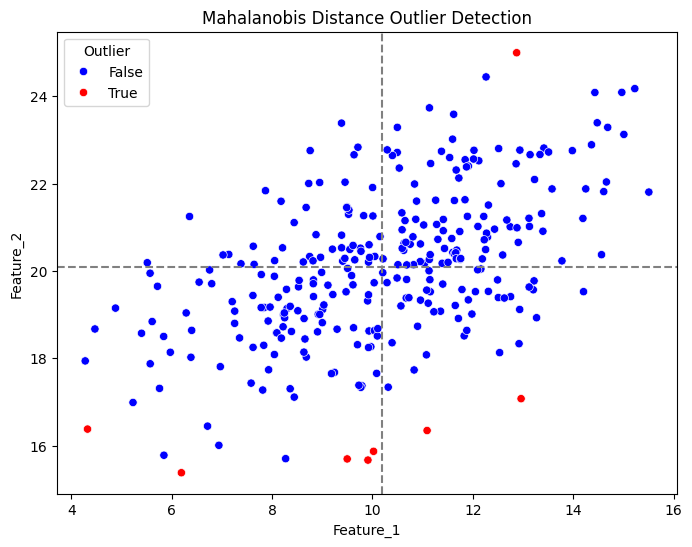

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a synthetic multivariate dataset
np.random.seed(0)
data = np.random.multivariate_normal(
    mean=[10, 20],
    cov=[[5, 2], [2, 3]],
    size=300
)

df = pd.DataFrame(data, columns=['Feature_1', 'Feature_2'])

# Step 2: Compute Mahalanobis distance
mean_vector = df.mean().values
cov_matrix = np.cov(df.values, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

def mahalanobis_distance(x, mean, inv_cov):
    x_minus_mu = x - mean
    return np.sqrt(x_minus_mu @ inv_cov @ x_minus_mu.T)

df['Mahalanobis_Dist'] = df.apply(lambda x: mahalanobis_distance(x[['Feature_1', 'Feature_2']].values, mean_vector, inv_cov_matrix), axis=1)

# Step 3: Determine threshold using chi-squared distribution
threshold = np.sqrt(chi2.ppf(0.975, df=2))  # 2 = number of features

# Step 4: Flag outliers
df['Outlier'] = df['Mahalanobis_Dist'] > threshold

# Step 5: Plot the results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Feature_1', y='Feature_2', hue='Outlier', palette={False: 'blue', True: 'red'})
plt.title('Mahalanobis Distance Outlier Detection')
plt.axhline(df['Feature_2'].mean(), color='gray', linestyle='--')
plt.axvline(df['Feature_1'].mean(), color='gray', linestyle='--')
plt.legend(title='Outlier')
plt.show()
